In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col='date',
                parse_dates=['date'])
df.shape

(1304, 1)

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]
df.shape

(1238, 1)

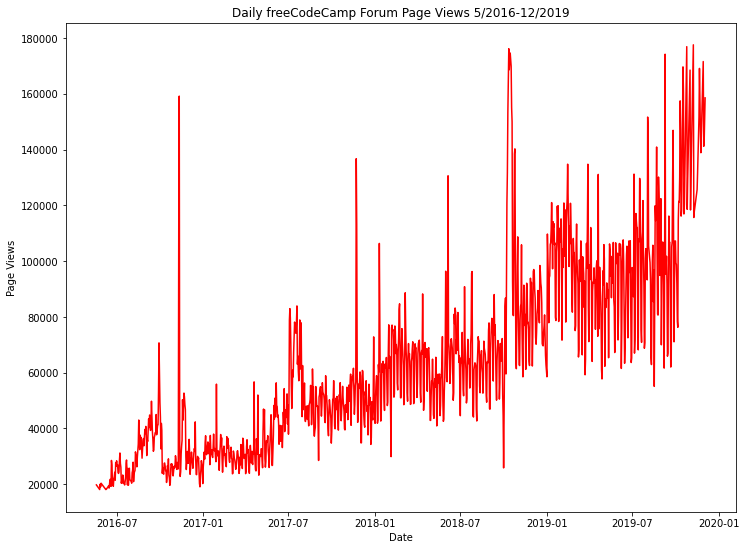

In [5]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(df.index, df['value'], c='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tick_params()
plt.show()

In [34]:
df_bar = df.groupby([df.index.year, df.index.month]).mean()
df_bar.unstack()

value                 ...                              
date             1              2   ...             11             12
date                                ...                              
2016            NaN            NaN  ...   40448.633333   27832.419355
2017   32785.161290   31113.071429  ...   57701.566667   48420.580645
2018   58580.096774   65679.000000  ...   78688.333333   80047.483871
2019  102056.516129  105968.357143  ...  143166.428571  150733.500000

[4 rows x 12 columns]

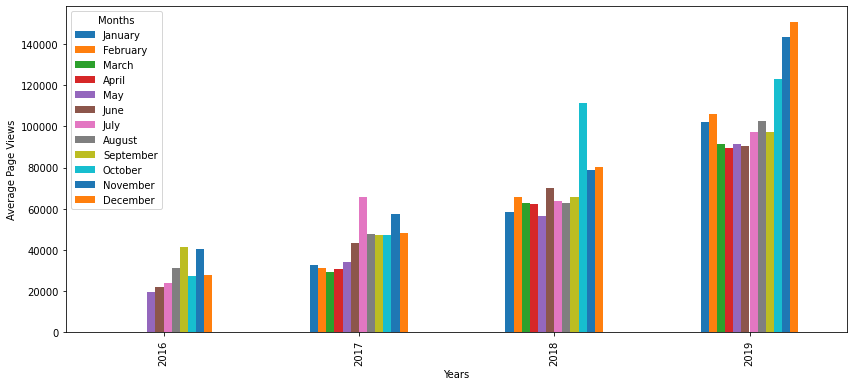

In [37]:
full_dates = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']
fig = df_bar.unstack().plot(kind='bar', figsize=(14,6)).figure
plt.ylabel('Average Page Views')
plt.xlabel('Years')
plt.legend(title='Months', labels=full_dates)
plt.show()

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


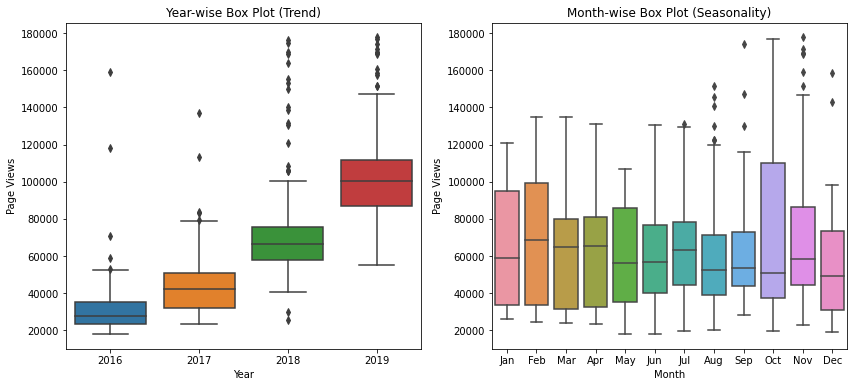

In [32]:
dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x=df_box['year'], y=df_box['value'])
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x=df_box['month'], y=df_box['value'], order=dates)
plt.title('Month-wise Box Plot (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Page Views')

plt.show()